In [1]:
import numpy as np
import pandas as pd

In [2]:
from models.Layers import ensemble_models
from DB.DB import db
from models.utils import Args
from models.utils import metric_r, metric_c

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'pytorch_lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'


In [3]:
train = pd.read_excel("DataBase/test2.xlsx",sheet_name=2)[['cas','smiles','log10']]
train.columns = ['cas','smiles','LogLD']
test = pd.read_excel("DataBase/test2.xlsx",sheet_name=3)[['cas','smiles','log10']]
test.columns = ['cas','smiles','LogLD']

In [4]:
print(train.shape)
print(test.shape)

(4556, 3)
(431, 3)


In [5]:
# 定义参数类
args = Args(train, test, AFP=False, RF=False, MPNN=False,
            SVR=True, save_r=False, plot=True,GAT=False, DNN=False,
            AD_FP=True)
# 实例化集成模型
eb = ensemble_models()

In [6]:
# 修改ECFP超参数
args.ECFP_Params=[2048,2]

size of train is(4556, 3) ,test is (431, 3)
start training SVR 


[23:54:56] WARNING: not removing hydrogen atom without neighbors
[23:54:56] WARNING: not removing hydrogen atom without neighbors


test_rmse  is  0.31692152530376505
test_mae  is  0.46104182741113053
test_R2  is  0.6895165476976298


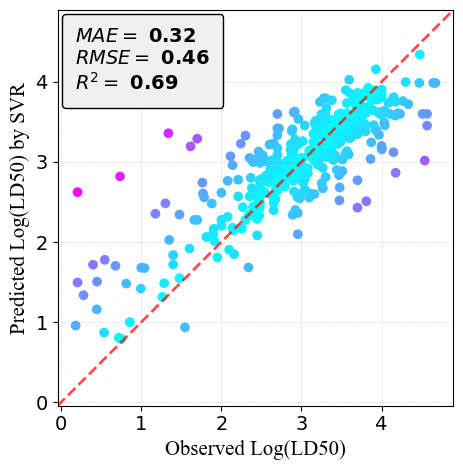

============SVR over============
开始进行使用域拟合


[23:55:41] WARNING: not removing hydrogen atom without neighbors
[23:55:41] WARNING: not removing hydrogen atom without neighbors
100%|█████████████████████████████████████████████████████████████████████████████| 4556/4556 [00:10<00:00, 417.56it/s]


聚类完成，共4556个分子，聚类为2552
完成对象训练集分类：调用self.train查看数据集
调用self.clusters查看communitys(二位列表)
基于训练集计算SLD,应先保证完成cluster_molecules_init
Calculating SLD for community 1/2552
Calculating SLD for community 101/2552
Calculating SLD for community 201/2552
Calculating SLD for community 301/2552
Calculating SLD for community 401/2552
Calculating SLD for community 501/2552
Calculating SLD for community 601/2552
Calculating SLD for community 701/2552
Calculating SLD for community 801/2552
Calculating SLD for community 901/2552
Calculating SLD for community 1001/2552
Calculating SLD for community 1101/2552
Calculating SLD for community 1201/2552
Calculating SLD for community 1301/2552
Calculating SLD for community 1401/2552
Calculating SLD for community 1501/2552
Calculating SLD for community 1601/2552
Calculating SLD for community 1701/2552
Calculating SLD for community 1801/2552
Calculating SLD for community 1901/2552
Calculating SLD for community 2001/2552
Calculating SLD for community 2101/2552
Calculat

In [7]:
# 训练第一层模型，save选择是否保存模
# 型
eb.Lay1_models_train(args ,save=True)

size of train is(6714, 3) ,test is (1677, 3)
start training MPNN 


6714it [00:00, 223752.20it/s]
100%|██████████████████████████████████████████████████████████████████████████| 6714/6714 [00:00<00:00, 145919.45it/s]
1677it [00:00, 209827.81it/s]
100%|██████████████████████████████████████████████████████████████████████████| 1677/1677 [00:00<00:00, 139893.55it/s]
1677it [00:00, 239719.44it/s]
100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:03<00:00, 36.15it/s]
                                                                                                                       
 39%|███████████████████████████████▏                                                 | 52/135 [00:01<00:02, 33.28it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.68it/s]
                                                                                                                       
100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:03<00:00, 35.85it/s]
                                                                                                                       
  0%|                                                                                           | 0/34 [00:00<?, ?it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.00it/s]
                                                                                                                       
 43%|██████████████████████████████████▊                                              | 58/135 [00:01<00:02, 36.29it/s]


 99%|███████████████████████████████████████████████████████████████████████████████▍| 134/135 [00:03<00:00, 35.09it/s]
                                                                                                                       
 99%|███████████████████████████████████████████████████████████████████████████████▍| 134/135 [00:03<00:00, 34.81it/s]
                                                                                                                       
 18%|██████████████▋                                                                    | 6/34 [00:00<00:00, 50.42it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.19it/s]
                                                                                                                       
 45%|████████████████████████████████████▌                                            | 61/135 [00:01<00:02, 35.33it/s]


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 133/135 [00:03<00:00, 34.32it/s]
                                                                                                                       
 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.17it/s]
                                                                                                                       
 53%|███████████████████████████████████████████▍                                      | 18/34 [00:00<00:00, 47.61it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 135/135 [00:03<00:00, 35.79it/s]
                                                                                                                       
 50%|████████████████████████████████████████▊                                        | 68/135 [00:02<00:02, 33.19it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 32.85it/s]
                                                                                                                       
 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 34.59it/s]
                                                                                                                       
 82%|███████████████████████████████████████████████████████████████████▌              | 28/34 [00:00<00:00, 46.51it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 32.85it/s]
                                                                                                                       
 59%|████████████████████████████████████████████████                                 | 80/135 [00:02<00:01, 35.99it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 34.31it/s]
                                                                                                                       
 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:04<00:00, 32.82it/s]
                                                                                                                       
  0%|                                                                                          | 0/135 [00:00<?, ?it/s]


 99%|██████████████████████████████████████████████████████████████████████████████▊ | 133/135 [00:03<00:00, 34.87it/s]
                                                                                                                       
 65%|████████████████████████████████████████████████████▊                            | 88/135 [00:02<00:01, 33.87it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 32.30it/s]
                                                                                                                       
 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 34.39it/s]
                                                                                                                       
  6%|████▊                                                                             | 8/135 [00:00<00:03, 33.25it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.27it/s]
                                                                                                                       
 74%|███████████████████████████████████████████████████████████▎                    | 100/135 [00:02<00:01, 34.69it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 34.78it/s]
                                                                                                                       
 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 33.48it/s]
                                                                                                                       
 15%|████████████                                                                     | 20/135 [00:00<00:03, 31.20it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 34.00it/s]
                                                                                                                       
 83%|██████████████████████████████████████████████████████████████████▎             | 112/135 [00:03<00:00, 33.34it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 32.76it/s]
                                                                                                                       
 99%|███████████████████████████████████████████████████████████████████████████████▍| 134/135 [00:04<00:00, 33.21it/s]
                                                                                                                       
 21%|████████████████▊                                                                | 28/135 [00:00<00:03, 34.41it/s]


 98%|██████████████████████████████████████████████████████████████████████████████▏ | 132/135 [00:03<00:00, 35.49it/s]
                                                                                                                       
100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [01:59<00:00,  4.80s/it]


Loading training args
Setting molecule featurization parameters to default.
Loading data


1677it [00:00, 210141.25it/s]
100%|██████████████████████████████████████████████████████████████████████████| 1677/1677 [00:00<00:00, 186243.22it/s]


Validating SMILES
Test size = 1,677


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:34<00:00, 34.83s/it]


Saving predictions to tmp/MPNN/test1.csv
Elapsed time = 0:00:35
Loading training args
Setting molecule featurization parameters to default.
Loading data


6714it [00:00, 239817.39it/s]
100%|██████████████████████████████████████████████████████████████████████████| 6714/6714 [00:00<00:00, 223640.25it/s]


Validating SMILES
Test size = 6,714


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Loading pretrained parameter "ffn.7.weight".
Loading pretrained parameter "ffn.7.bias".
Moving model to cuda



100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:35<00:00, 35.81s/it]


Saving predictions to tmp/MPNN/train_MPNN.csv
Elapsed time = 0:00:36


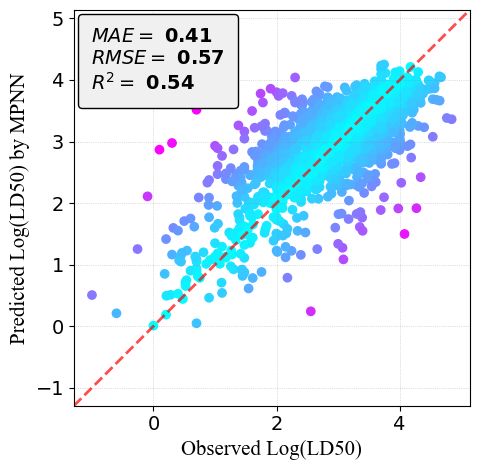

============MPNN over============


In [34]:
# 训练第一层模型，save选择是否保存模
# 型
eb.Lay1_models_train(args ,save=True)

In [25]:
from models.utils import plot_parity

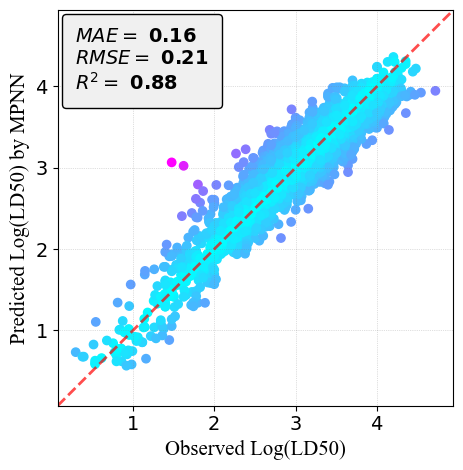

In [29]:
plot_parity(eb.L1_train_df.true, eb.L1_train_df.MPNN,name='MPNN')

start fitting L2 models
Start fitting MLP


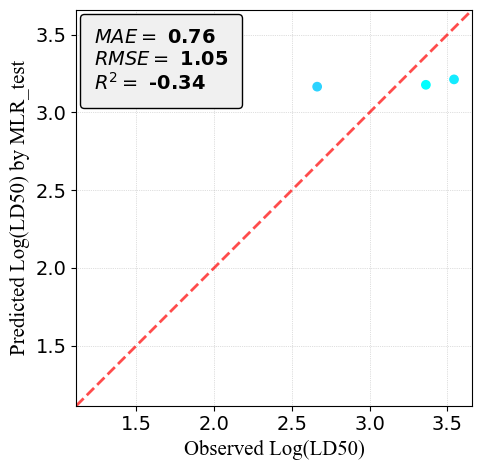

Save MLR models
Start fitting RF in L2


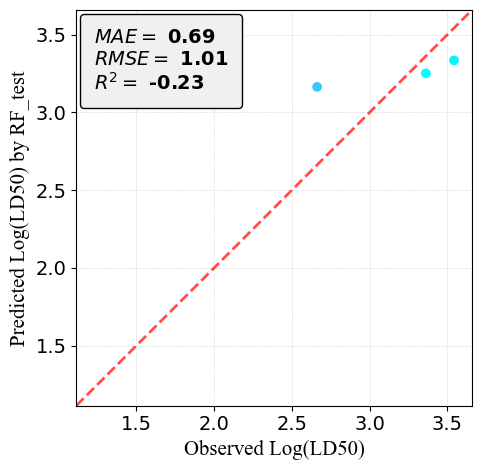

Save RF models
start fitting SVR model


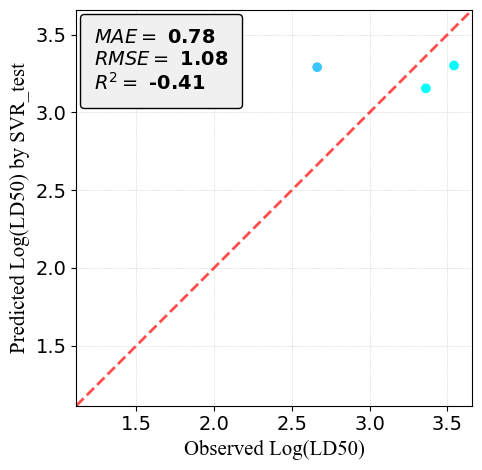

Save SVR models


In [32]:
# 设置第二层模型参数 args.model_lis_L2
args.model_lis_L2 = [True for i in range(3)]
eb.Lay2_models_train(args,save=True)